In [1]:
using OptimalControl

In [2]:
@def ocp begin
    t ∈ [ 0, 1 ], time
    x ∈ R², state
    u ∈ R, control
    x(0) == [ -1, 0 ]
    x(1) == [ 0, 0 ]
    ẋ(t) == [ x₂(t), u(t) ]
    ∫( 0.5u(t)^2 ) → min
end
sol = solve(ocp, display=false)

Method = (

:direct, :adnlp, :ipopt)


This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.0.

Number of nonzeros in equality constraint Jacobian...:     1205
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      101

Total number of variables............................:      404
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      305
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 1.10e+00 1.92e-14   0.0 0.00e+00    -  0.00e+00 0.00e+00 

CTBase.OptimalControlSolution

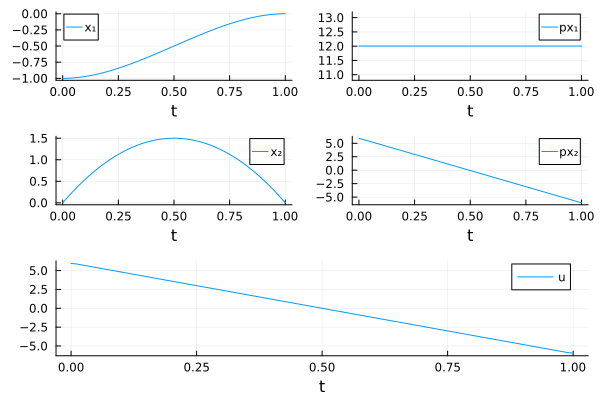

In [3]:
plot(sol)

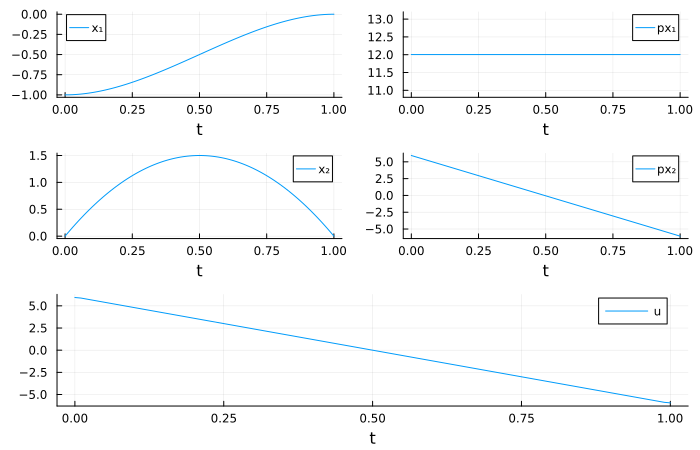

In [9]:
plot(sol, size=(700, 450))

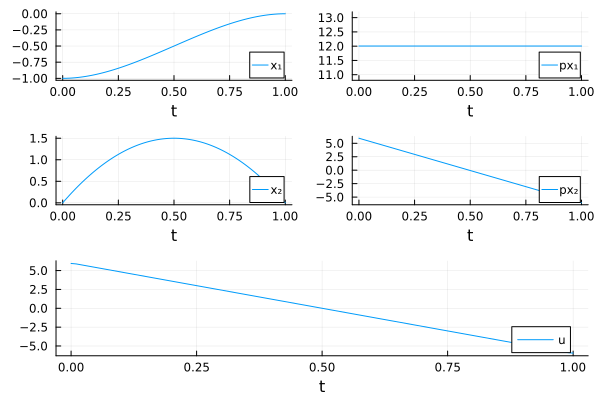

In [5]:
plot(sol, legend=:bottomright)

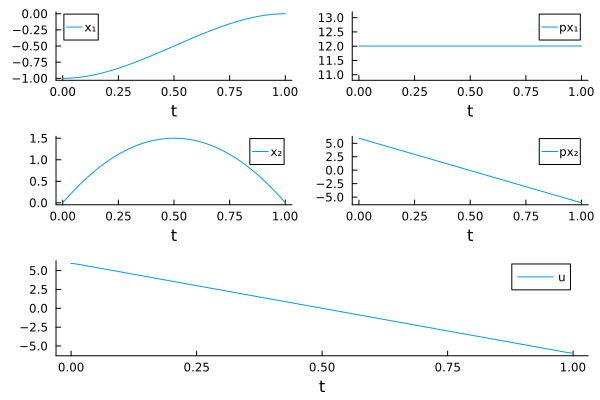

In [8]:
plot(sol, grid=false)

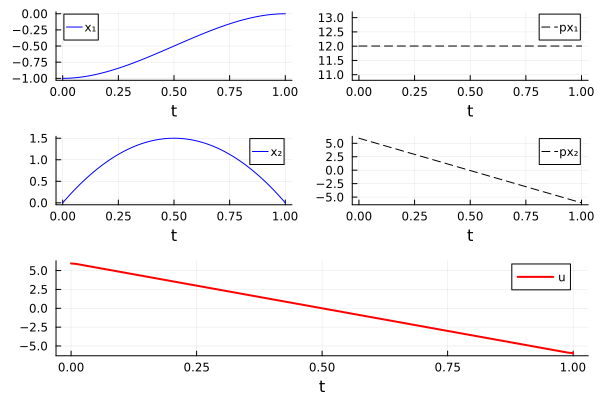

In [10]:
plot(sol, 
    state_style=(color=:blue,), 
    costate_style=(color=:black, linestyle=:dash),
    control_style=(color=:red, linewidth=2))

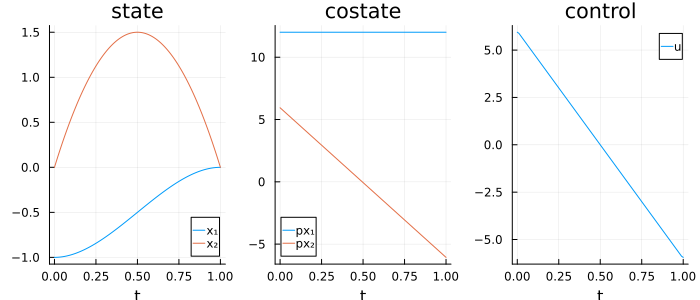

In [14]:
plot(sol, layout=:group, size=(700, 300))

In [15]:
@def ocp begin
    t ∈ [ 0, 1 ], time
    x ∈ R², state
    u ∈ R, control
    x(0) == [ -0.5, -0.5 ]
    x(1) == [ 0, 0 ]
    ẋ(t) == [ x₂(t), u(t) ]
    ∫( 0.5u(t)^2 ) → min
end
sol2 = solve(ocp, display=false)

CTBase.OptimalControlSolution

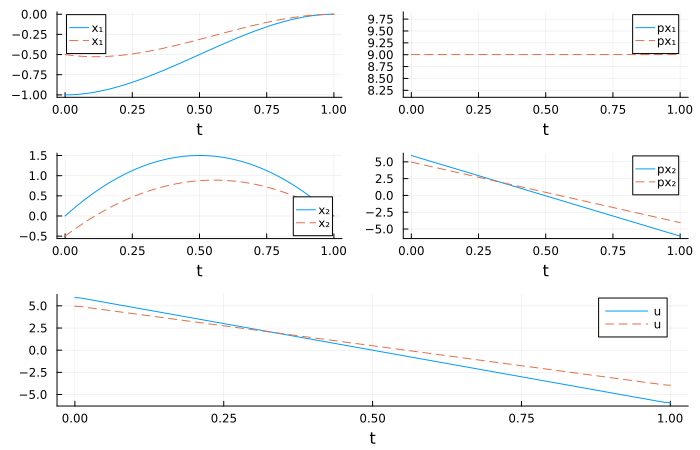

In [18]:
# first plot
plt = plot(sol, size=(700, 450))
# second plot
style = (linestyle=:dash, )
plot!(plt, sol2, state_style=style, costate_style=style, control_style=style)

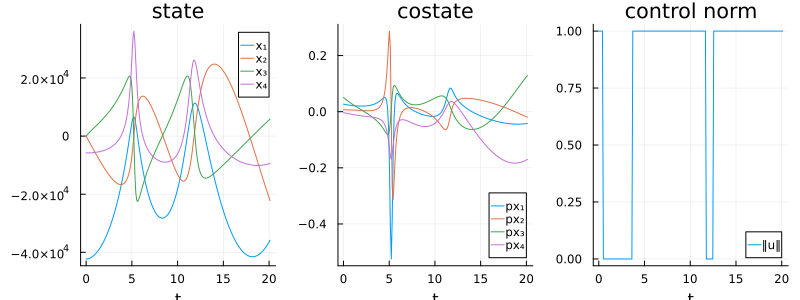

In [26]:
using CTProblems
prob = Problem(:orbital_transfert, :consumption)
sol = prob.solution
plot(prob.solution, size=(800, 300), control=:norm, layout=:group)

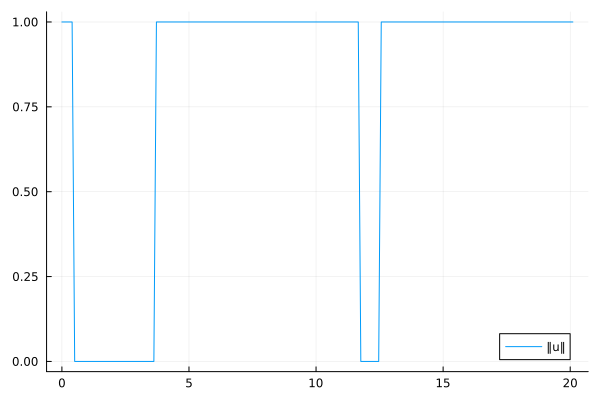

In [37]:
using LinearAlgebra
t = sol.times
x = sol.state
p = sol.costate
u = sol.control
plot(t, norm∘u, label="‖u‖") 